## Random Forest Classifier

In [1]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Dataset

data=pd.read_excel('Raisin_Dataset.xlsx')

In [3]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
data.shape

(900, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [7]:
# Converting the class values to 0 and 1
data['Class']=data['Class'].map({'Kecimen':0,'Besni':1})

In [8]:
data1=data.copy()

In [9]:
# Checking the Class Values
data['Class'].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

In [10]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

#### EDA

#### Univariate Analysis

##### Area : 

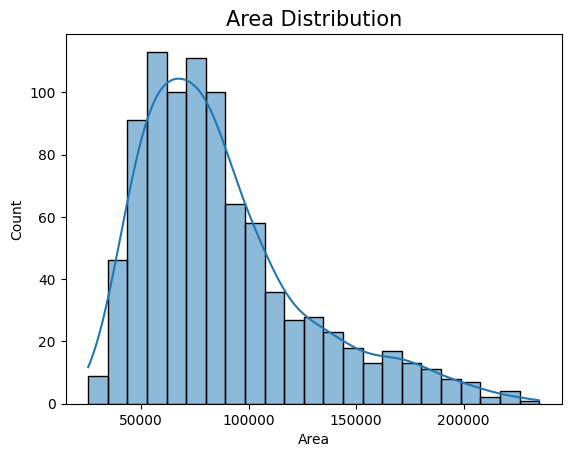

In [11]:
sns.histplot(data=data,x='Area',kde=True)
plt.title('Area Distribution', fontsize=15)
plt.show()

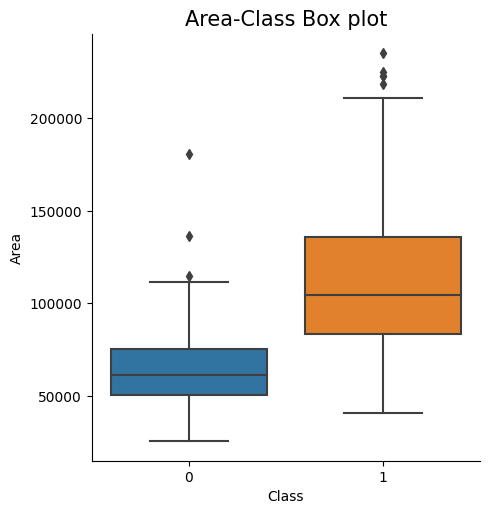

In [12]:
sns.catplot(data=data, x='Class', y='Area', kind='box')
plt.title("Area-Class Box plot",fontsize=15)
plt.show()

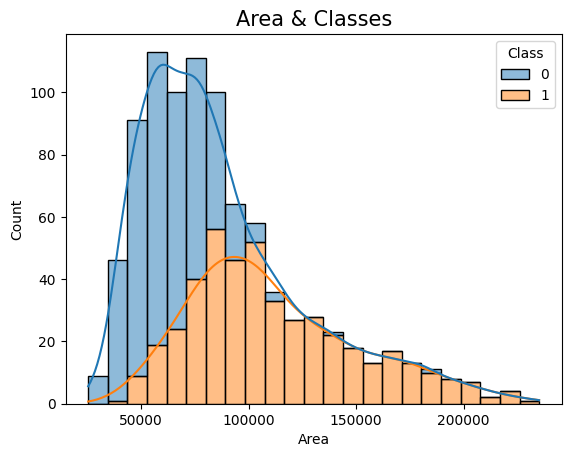

In [13]:
sns.histplot(data=data,x='Area',hue='Class',kde=True,multiple='stack')
plt.title('Area & Classes',fontsize=15)
plt.show()

##### MajorAxis Length

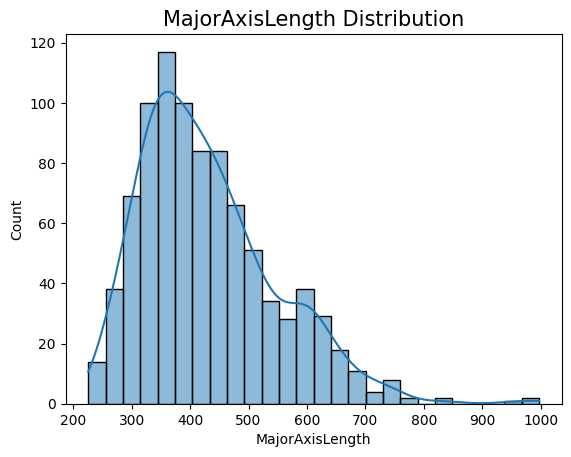

In [14]:
sns.histplot(data=data,x='MajorAxisLength',kde=True)
plt.title('MajorAxisLength Distribution',fontsize=15)
plt.show()

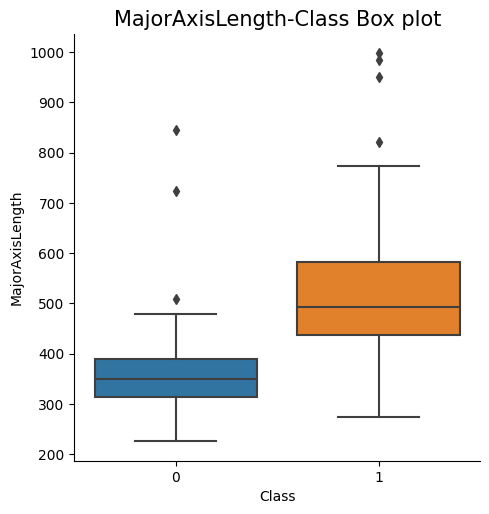

In [15]:
sns.catplot(data=data,x='Class',y='MajorAxisLength',kind='box')
plt.title("MajorAxisLength-Class Box plot",fontsize=15)
plt.show()

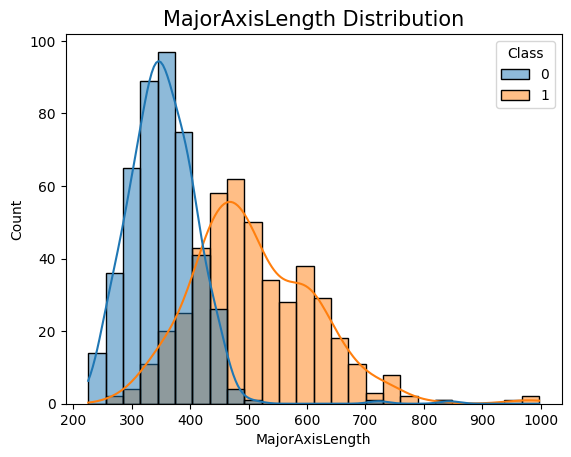

In [16]:
sns.histplot(data=data,x='MajorAxisLength',hue='Class',kde=True,multiple='layer')
plt.title('MajorAxisLength Distribution',fontsize=15)
plt.show()

##### MinorAxisLength

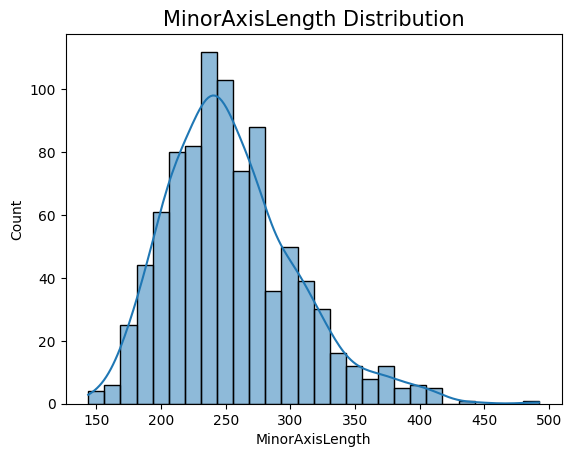

In [17]:
sns.histplot(data=data,x='MinorAxisLength',kde=True)
plt.title('MinorAxisLength Distribution',fontsize=15)
plt.show()

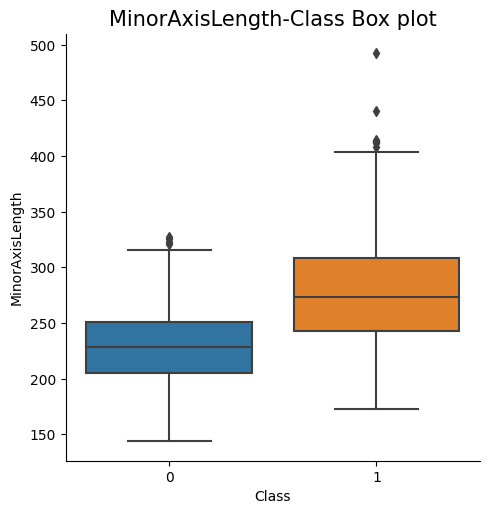

In [18]:
sns.catplot(data=data,x='Class',y='MinorAxisLength',kind='box',)
plt.title("MinorAxisLength-Class Box plot",fontsize=15)
plt.show()

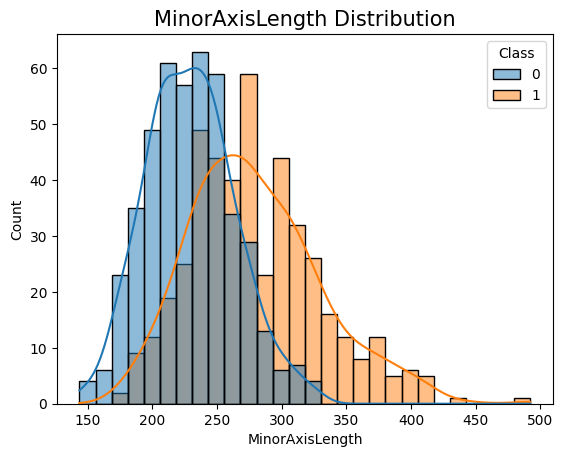

In [19]:
sns.histplot(data=data,x='MinorAxisLength',hue='Class',kde=True,multiple='layer')
plt.title('MinorAxisLength Distribution',fontsize=15)
plt.show()

##### Eccentricity:

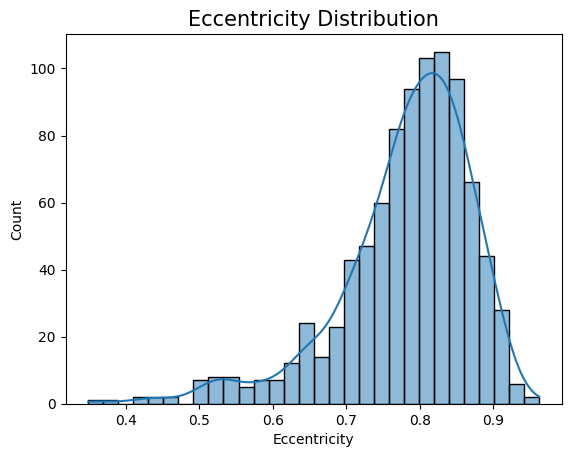

In [20]:
sns.histplot(data=data,x='Eccentricity',kde=True)
plt.title('Eccentricity Distribution',fontsize=15)
plt.show()

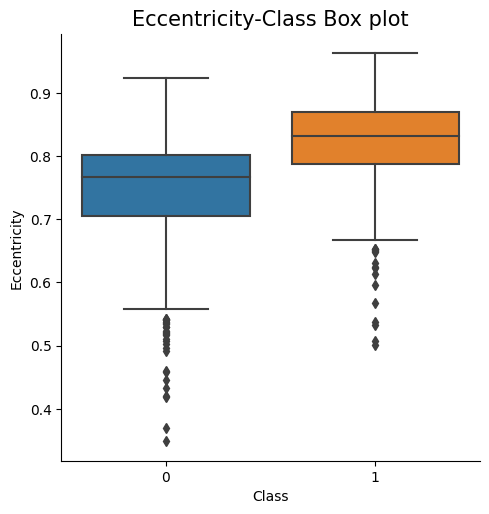

In [21]:
sns.catplot(data=data,x='Class',y='Eccentricity',kind='box',)
plt.title("Eccentricity-Class Box plot",fontsize=15)
plt.show()

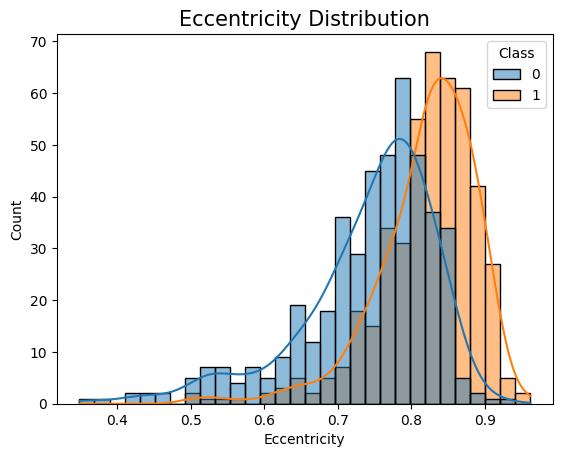

In [22]:
sns.histplot(data=data,x='Eccentricity',hue='Class',kde=True,multiple='layer')
plt.title('Eccentricity Distribution',fontsize=15)
plt.show()

##### ConvexArea :


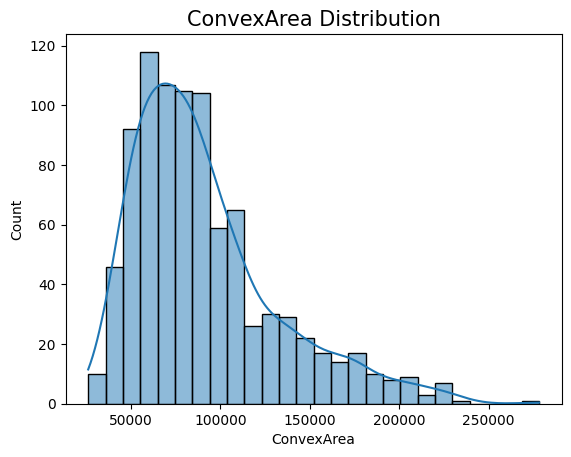

In [23]:
sns.histplot(data=data,x='ConvexArea',kde=True)
plt.title('ConvexArea Distribution',fontsize=15)
plt.show()

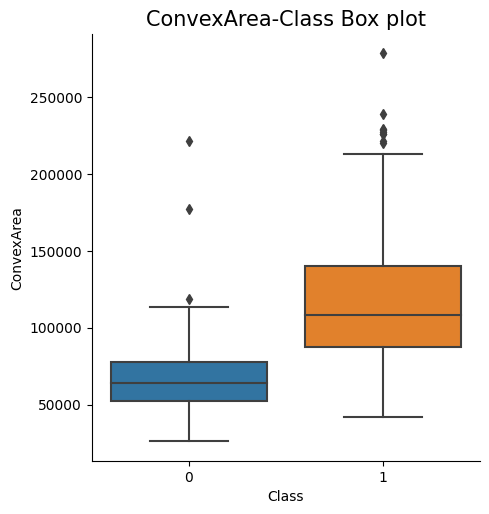

In [24]:
sns.catplot(data=data,x='Class',y='ConvexArea',kind='box',)
plt.title("ConvexArea-Class Box plot",fontsize=15)
plt.show()

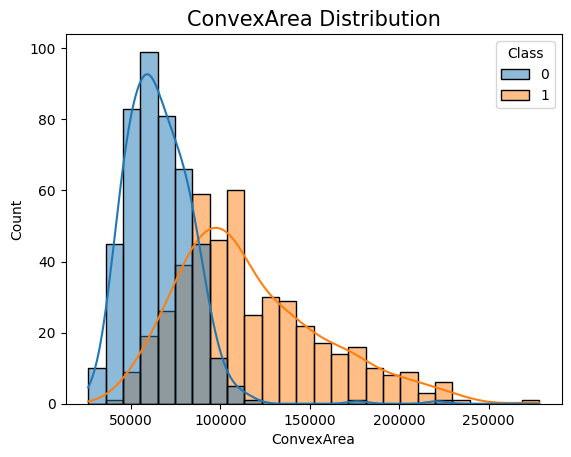

In [25]:
sns.histplot(data=data,x='ConvexArea',hue='Class',kde=True,multiple='layer')
plt.title('ConvexArea Distribution',fontsize=15)
plt.show()

##### Extent

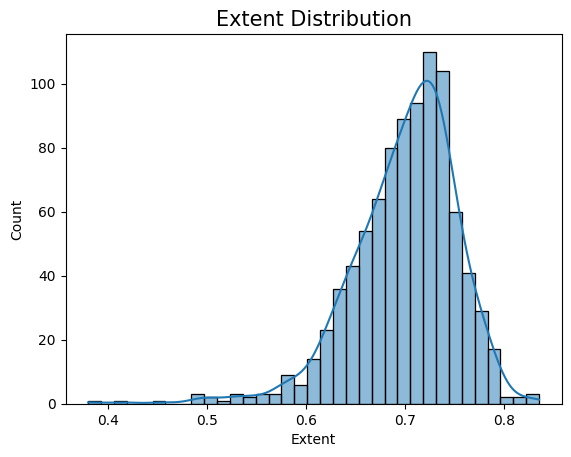

In [26]:
sns.histplot(data=data,x='Extent',kde=True)
plt.title('Extent Distribution',fontsize=15)
plt.show()

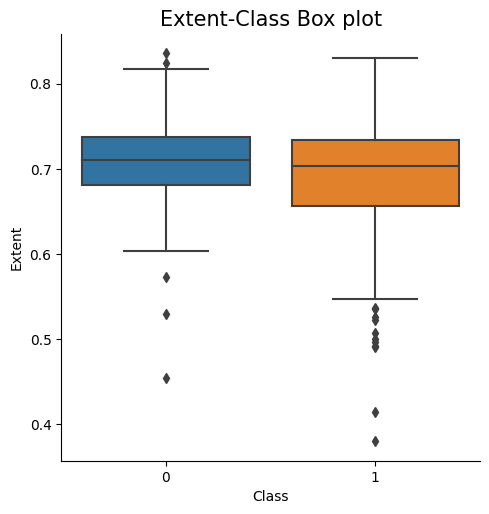

In [27]:
sns.catplot(data=data,x='Class',y='Extent',kind='box',)
plt.title("Extent-Class Box plot",fontsize=15)
plt.show()

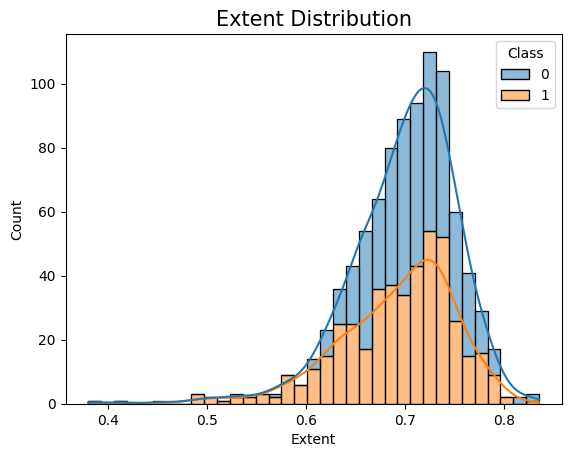

In [28]:
sns.histplot(data=data,x='Extent',hue='Class',kde=True,multiple='stack')
plt.title('Extent Distribution',fontsize=15)
plt.show()

##### Perimeter :

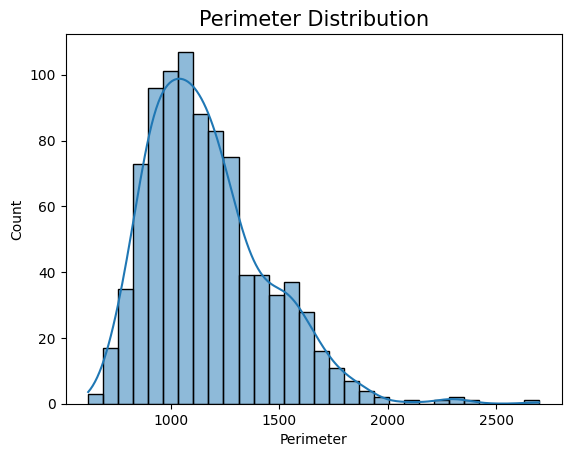

In [29]:
sns.histplot(data=data,x='Perimeter',kde=True)
plt.title('Perimeter Distribution',fontsize=15)
plt.show()

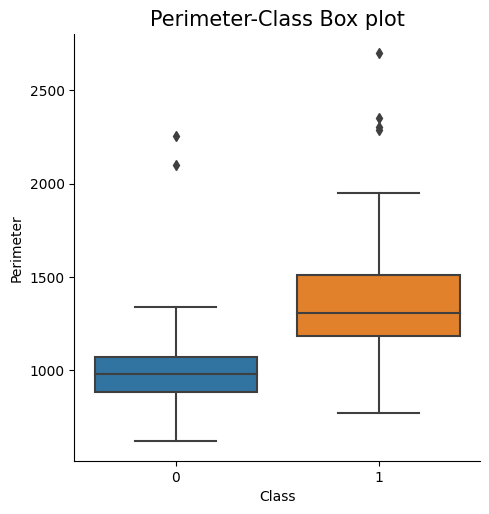

In [30]:
sns.catplot(data=data,x='Class',y='Perimeter',kind='box',)
plt.title("Perimeter-Class Box plot",fontsize=15)
plt.show()

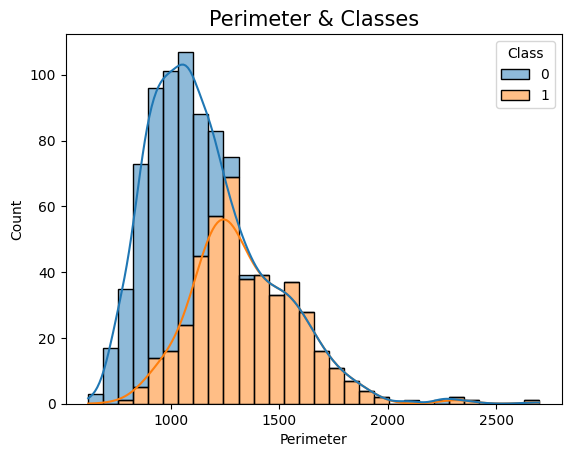

In [31]:
sns.histplot(data=data,x='Perimeter',hue='Class',kde=True,multiple='stack')
plt.title('Perimeter & Classes',fontsize=15)
plt.show()

#### Correlation : 

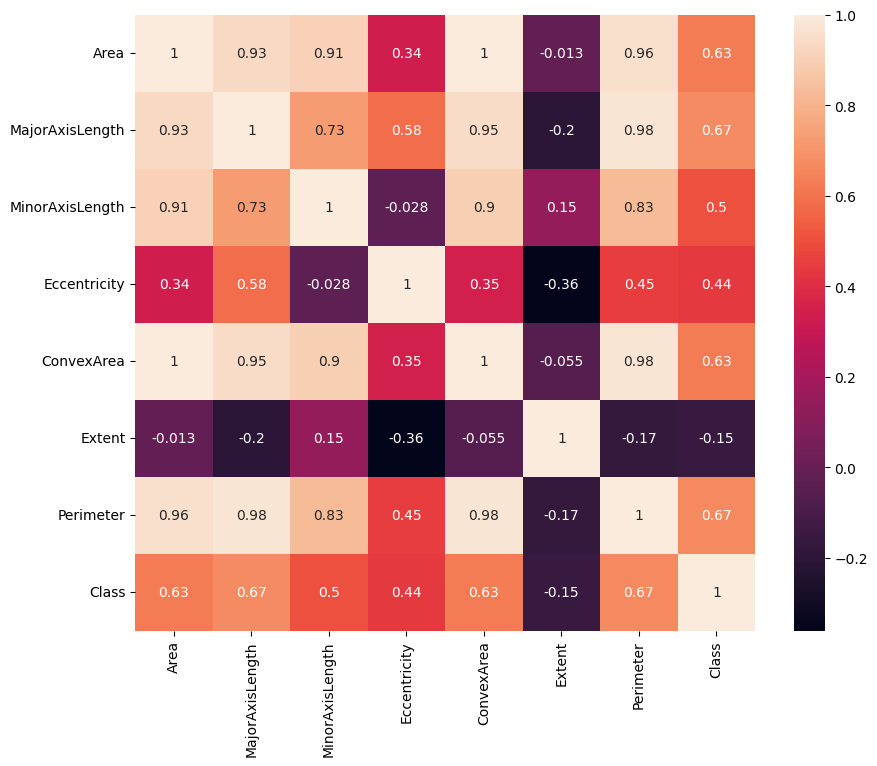

In [32]:
Corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr, annot=True)
plt.show()

There are many strong Positive relations let's understand them one by one.

#### Area vs Perimeter  (0.96)

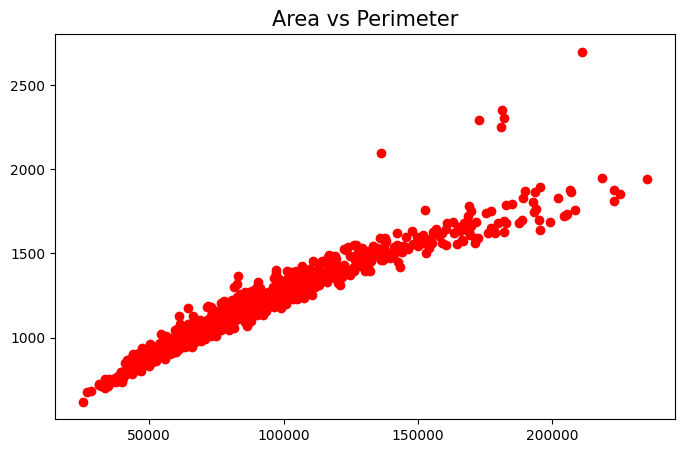

In [33]:
plt.figure(figsize=(8,5))
plt.title("Area vs Perimeter",fontsize=15)
plt.scatter(data.Area, data.Perimeter,color='r')
plt.show()

This Confirms the Strong Linear Relationship

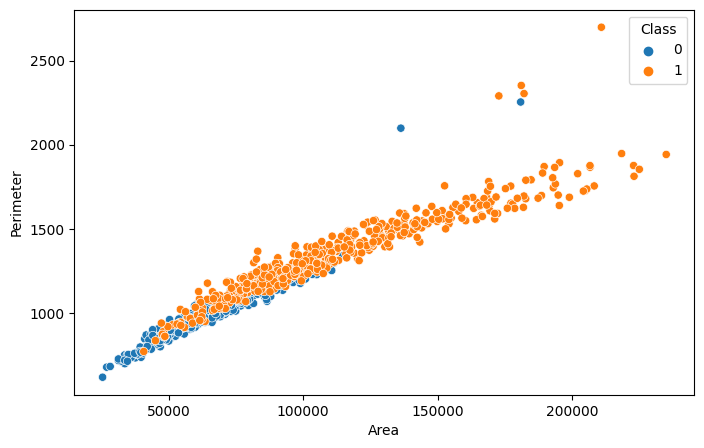

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='Area',y='Perimeter',hue='Class',)
plt.show()

The classses are also sperable (a little), higher the Area and Perimeter values the class is more likely to be Besin. This confirms the Box Plot and Histogram(+Density) Plot relation we observed in the starting.

#### Area vs Axis (0.91-0.93)

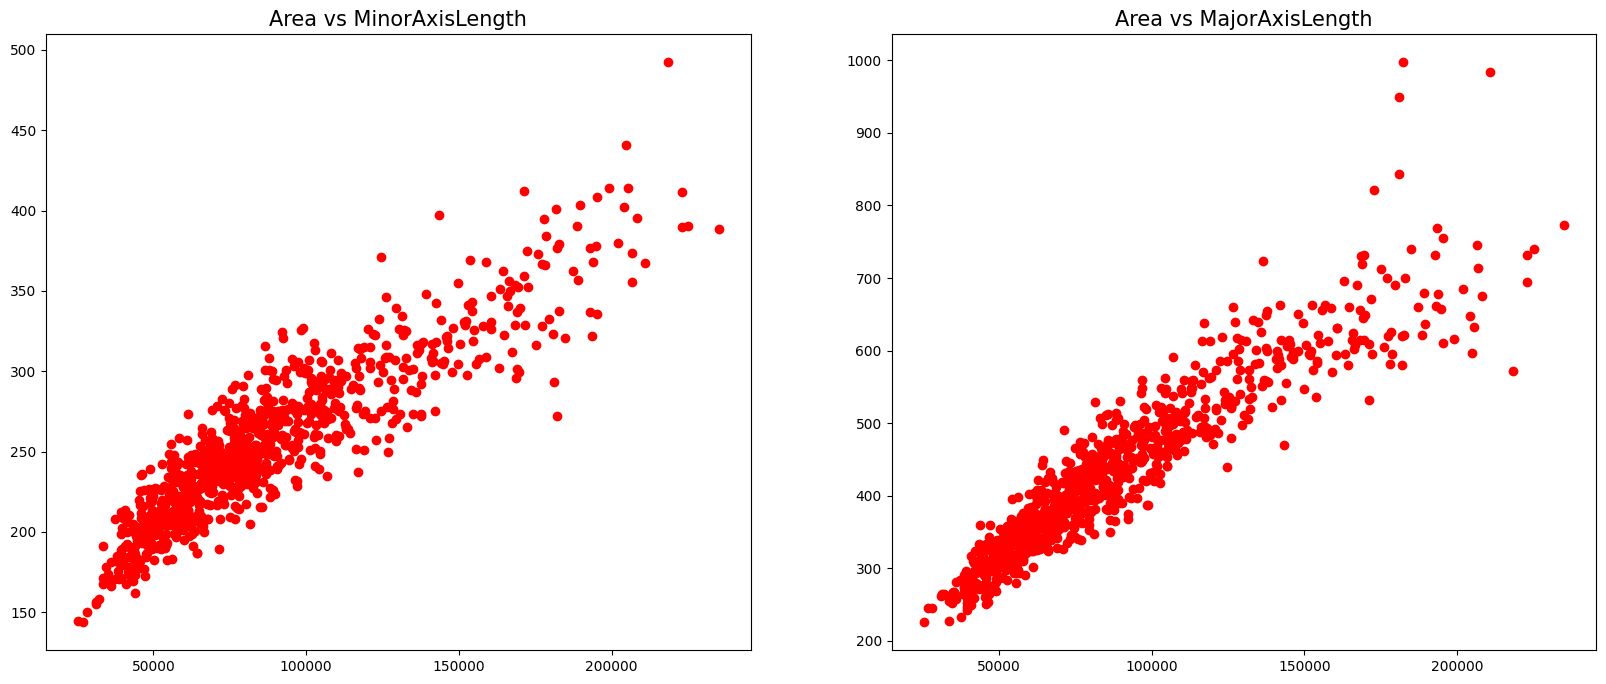

In [35]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Area vs MinorAxisLength",fontsize=15)
plt.scatter(data.Area, data.MinorAxisLength,color='r')


plt.subplot(1,2,2)
plt.title("Area vs MajorAxisLength",fontsize=15)
plt.scatter(data.Area, data.MajorAxisLength,color='r')
plt.show()

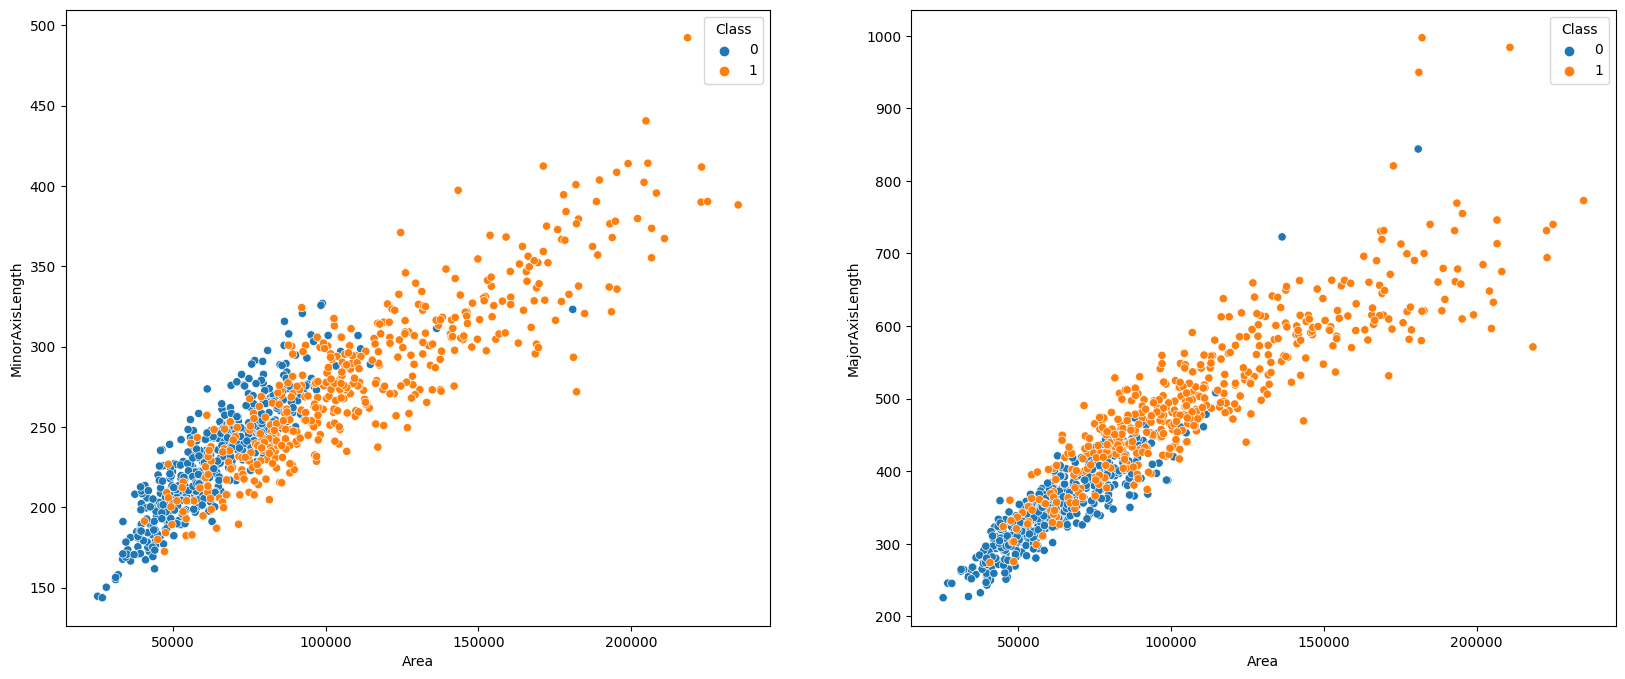

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=data, x='Area',y='MinorAxisLength',hue='Class',)

plt.subplot(1,2,2)
sns.scatterplot(data=data,x='Area',y='MajorAxisLength',hue='Class',)
plt.show()

#### MajorAxis vs Perimeter (0.98)

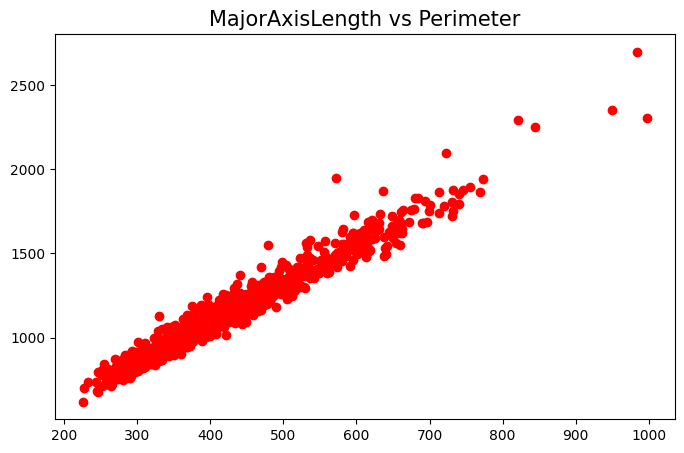

In [37]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs Perimeter",fontsize=15)
plt.scatter(data.MajorAxisLength, data.Perimeter,color='r')
plt.show()

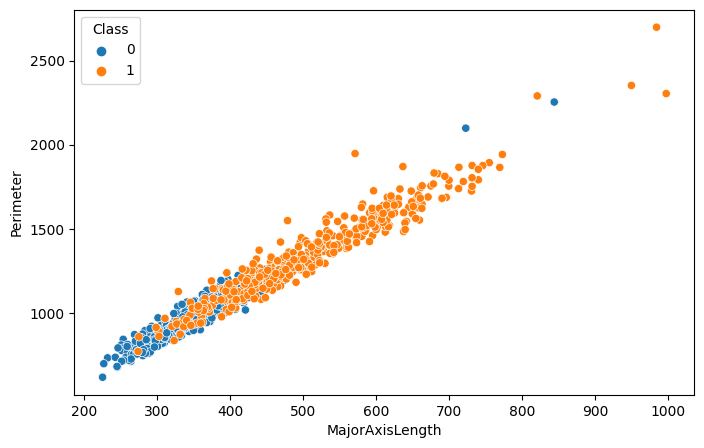

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='MajorAxisLength',y='Perimeter',hue='Class',)
plt.show()

#### MajorAxis vs ConvexArea(0.95)

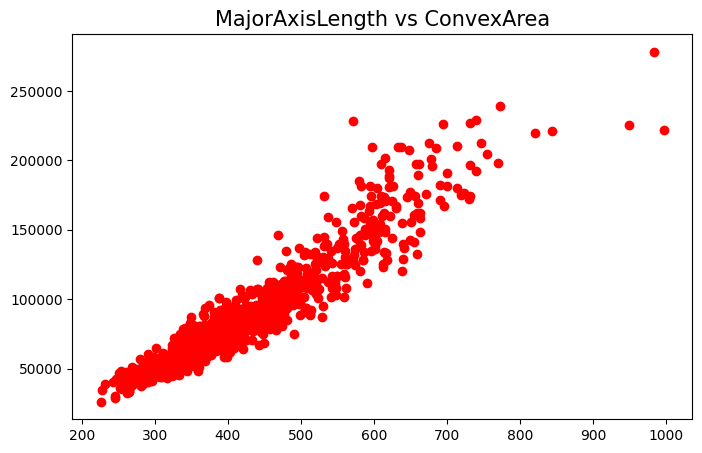

In [39]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs ConvexArea",fontsize=15)
plt.scatter(data.MajorAxisLength, data.ConvexArea,color='r')
plt.show()

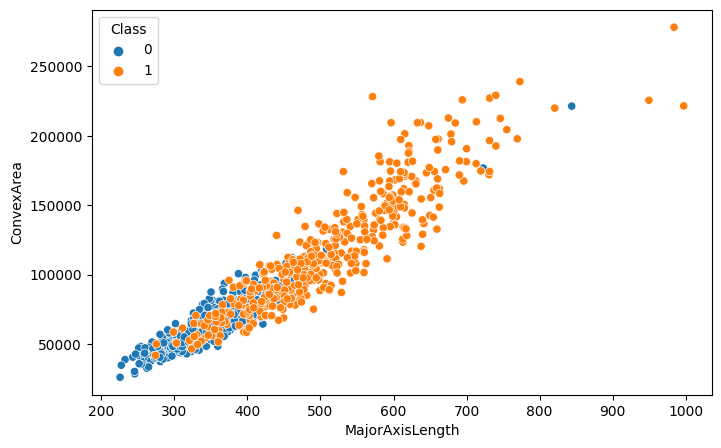

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='MajorAxisLength',y='ConvexArea',hue='Class',)
plt.show()

#### MajorAxis vs MinorAxis (0.73)

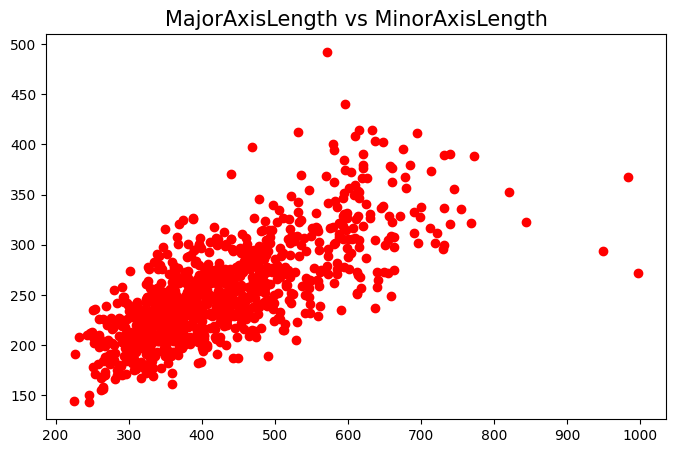

In [41]:
plt.figure(figsize=(8,5))
plt.title("MajorAxisLength vs MinorAxisLength",fontsize=15)
plt.scatter(data.MajorAxisLength, data.MinorAxisLength,color='r')
plt.show()

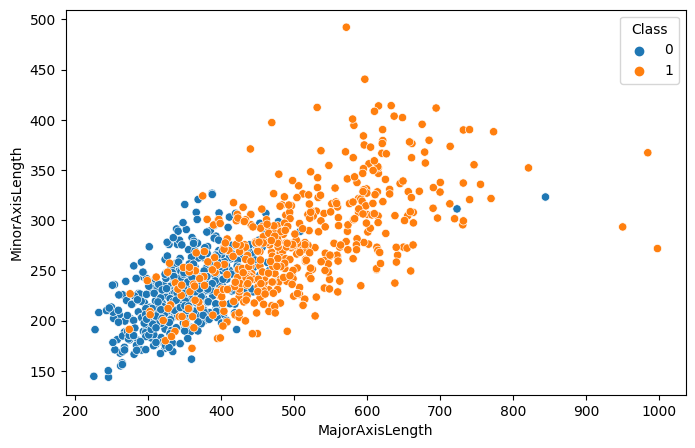

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='MajorAxisLength',y='MinorAxisLength',hue='Class',)
plt.show()

#### MinorAxisLength vs Perimeter (0.83)

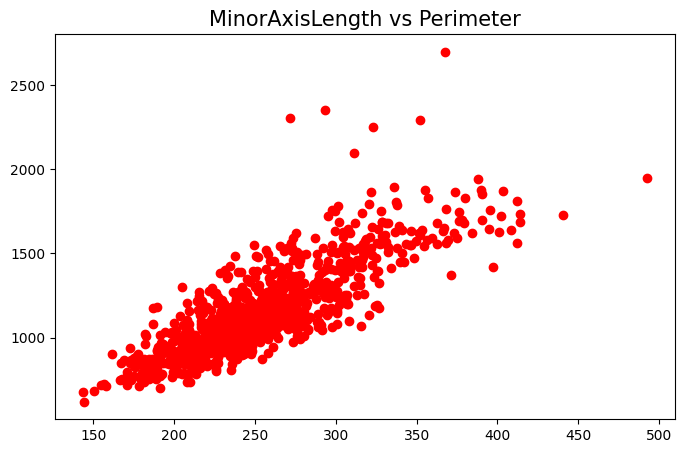

In [43]:
plt.figure(figsize=(8,5))
plt.title("MinorAxisLength vs Perimeter",fontsize=15)
plt.scatter(data.MinorAxisLength, data.Perimeter,color='r')
plt.show()

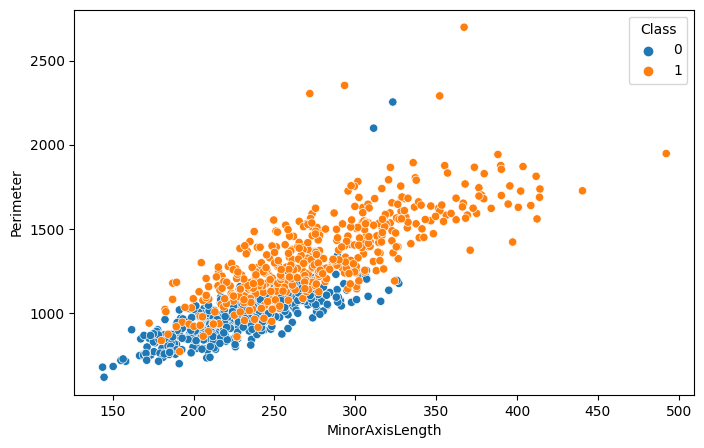

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='MinorAxisLength',y='Perimeter',hue='Class',)
plt.show()

#### MinorAxisLength vs ConvexArea (0.90)

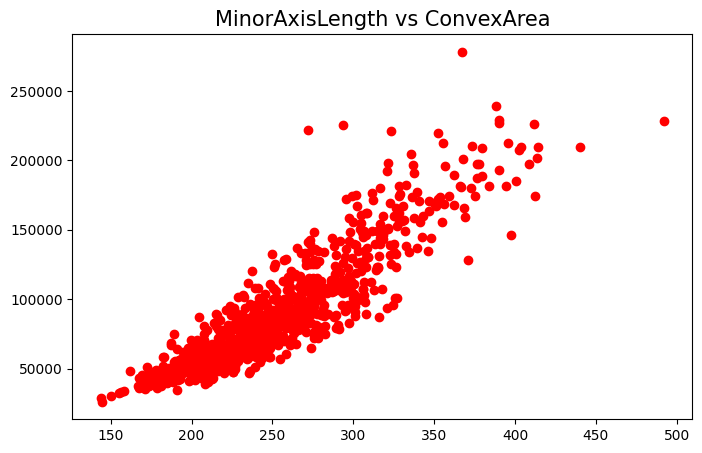

In [45]:
plt.figure(figsize=(8,5))
plt.title("MinorAxisLength vs ConvexArea",fontsize=15)
plt.scatter(data.MinorAxisLength, data.ConvexArea,color='r')
plt.show()

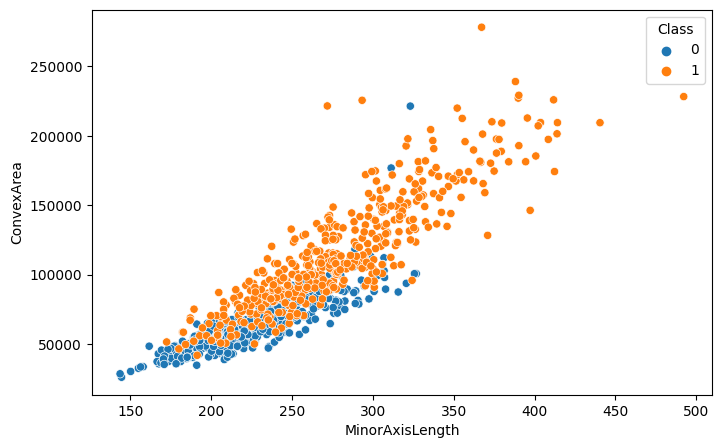

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='MinorAxisLength',y='ConvexArea',hue='Class',)
plt.show()

#### ConvexArea vs Perimeter (0.98)

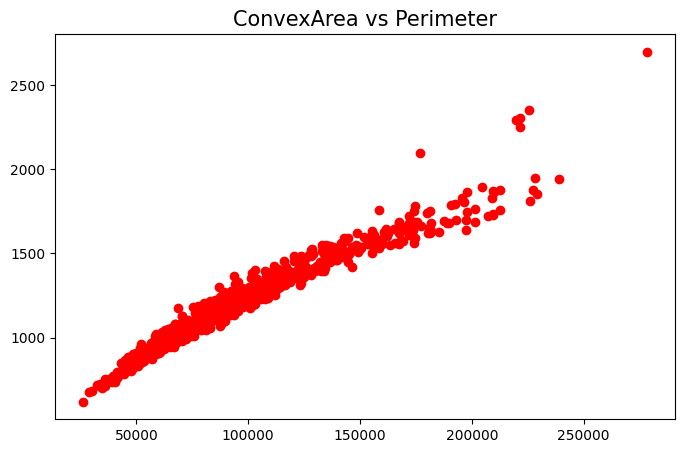

In [47]:
plt.figure(figsize=(8,5))
plt.title("ConvexArea vs Perimeter",fontsize=15)
plt.scatter(data.ConvexArea, data.Perimeter,color='r')
plt.show()

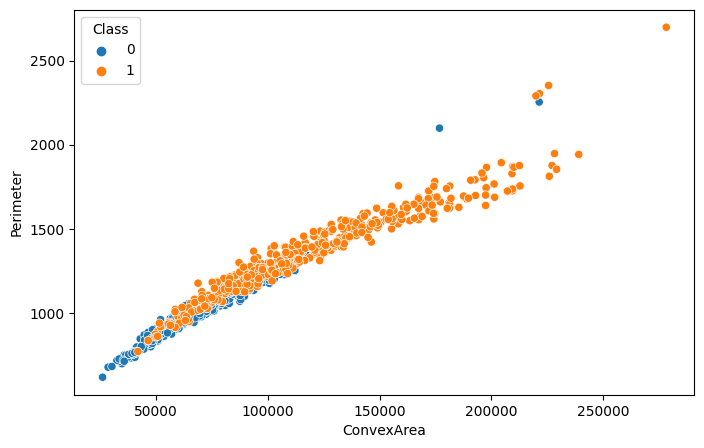

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='ConvexArea',y='Perimeter',hue='Class',)
plt.show()

All other relation were less that 70% and the negative relations weren't that strong to be worth to be visualized.

### Data Scaling : 

In [49]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
data['MinorAxisLength'] = mms.fit_transform(data[['MinorAxisLength']])
data['Eccentricity'] = mms.fit_transform(data[['Eccentricity']])
data['Perimeter'] = mms.fit_transform(data[['Perimeter']])

# Standardization
data['Area'] = ss.fit_transform(data[['Area']])
data['MajorAxisLength'] = ss.fit_transform(data[['MajorAxisLength']])
data['ConvexArea'] = ss.fit_transform(data[['ConvexArea']])
data['Extent'] = ss.fit_transform(data[['Extent']])
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,-0.007186,0.097577,0.314376,0.767872,-0.015709,1.106743,0.271791,0
1,-0.324217,-0.209012,0.284945,0.738636,-0.304248,-0.287777,0.241842,0
2,0.078292,0.097758,0.351778,0.733009,0.062113,-1.158250,0.283594,0
3,-1.074286,-1.245051,0.186620,0.548194,-1.076165,0.001711,0.108284,0
4,-0.215393,-0.678958,0.422064,0.350968,-0.238623,1.745259,0.218493,0


Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

We have 2 options for data scaling :

1) Normalization

2) Standardization.

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

### Train Test Split

In [50]:
y_data = data1.pop('Class').to_numpy()
X_data = data1.to_numpy()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2)

### Model Building :

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc2 = RandomForestClassifier()

In [55]:
rfc2.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred_test = rfc2.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test, y_pred_test)

0.8777777777777778

### Experimenting

In [59]:
randmf = RandomForestClassifier(n_estimators = 7, min_samples_split = 10, min_samples_leaf= 5, max_features = 'auto', max_depth= 67, bootstrap=True)
randmf.fit( X_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=67, max_features='auto', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=7)

In [60]:
y_pred_test_exp = randmf.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred_test_exp)

0.8666666666666667